In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
from pandas.api.types import CategoricalDtype

In [ ]:
death_per_borough ='death_data/per_borough_gradient.csv'

In [ ]:
df = pd.read_csv(death_per_borough,index_col=[1])
df=df.drop(df.columns[[0]], axis=1) 
df=df.dropna()
#df.set_index('Date',drop=True)
df.head()

In [ ]:
gradient=df.pct_change()

In [31]:
gradient

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
Date,,,,,,
2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24,0.702381,1.444444,3.921053,0.808333,0.113636,1.040923
2020-03-25,-0.001876,-0.057143,-0.251515,-0.032006,-0.738095,-0.144900
2020-03-26,-0.280702,-0.492898,-0.355993,-0.336957,0.428571,-0.337662
2020-03-27,-0.212500,-0.023965,-0.348485,-0.372672,0.130769,-0.232877
2020-03-28,0.923621,1.457983,1.369231,1.127259,0.125541,1.108889
2020-03-29,-0.530960,-0.830861,-0.750384,-0.619057,-0.769767,-0.684404
2020-03-30,-0.393617,0.554655,0.444660,0.199872,2.739130,0.148859
2020-03-31,0.522136,0.243280,-0.459034,0.132598,-0.405172,0.119498


In [49]:
gradient=gradient.dropna()

In [51]:
gradient = gradient.reset_index()
gradient

,Date,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
0,2020-03-24,0.702381,1.444444,3.921053,0.808333,0.113636,1.040923
1,2020-03-25,-0.001876,-0.057143,-0.251515,-0.032006,-0.738095,-0.144900
2,2020-03-26,-0.280702,-0.492898,-0.355993,-0.336957,0.428571,-0.337662
3,2020-03-27,-0.212500,-0.023965,-0.348485,-0.372672,0.130769,-0.232877
4,2020-03-28,0.923621,1.457983,1.369231,1.127259,0.125541,1.108889
5,2020-03-29,-0.530960,-0.830861,-0.750384,-0.619057,-0.769767,-0.684404
6,2020-03-30,-0.393617,0.554655,0.444660,0.199872,2.739130,0.148859
7,2020-03-31,0.522136,0.243280,-0.459034,0.132598,-0.405172,0.119498
8,2020-04-01,0.711061,0.232184,2.320930,-0.188830,-0.422886,0.273591
9,2020-04-02,-0.546995,-0.323034,-0.717677,-0.383937,-0.235160,-0.460667


In [52]:
gr=pd.melt(gradient,  id_vars=['Date'], value_vars=['Total','Bronx','Brooklyn','Manhattan','Queens', 'Staten Island'])

In [53]:
gr

,Date,variable,value
0,2020-03-24,Total,1.040923
1,2020-03-25,Total,-0.144900
2,2020-03-26,Total,-0.337662
3,2020-03-27,Total,-0.232877
4,2020-03-28,Total,1.108889
...,...,...,...
61,2020-03-30,Staten Island,2.739130
62,2020-03-31,Staten Island,-0.405172
63,2020-04-01,Staten Island,-0.422886
64,2020-04-02,Staten Island,-0.235160


In [55]:
df=gr.rename(columns={"variable": "Borough","value":"Death"}, errors="raise")
df

,Date,Borough,Death
0,2020-03-24,Total,1.040923
1,2020-03-25,Total,-0.144900
2,2020-03-26,Total,-0.337662
3,2020-03-27,Total,-0.232877
4,2020-03-28,Total,1.108889
...,...,...,...
61,2020-03-30,Staten Island,2.739130
62,2020-03-31,Staten Island,-0.405172
63,2020-04-01,Staten Island,-0.422886
64,2020-04-02,Staten Island,-0.235160


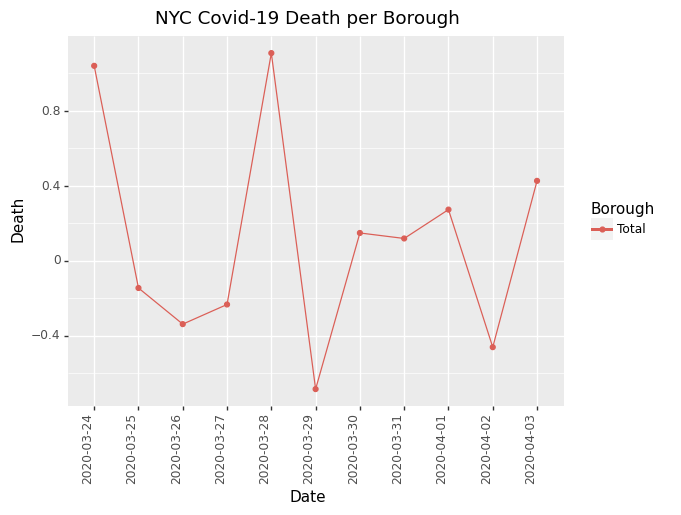

<ggplot: (-9223372036568207756)>

In [58]:
(ggplot(df[df.Borough=='Total'])         # defining what data to use
 + aes(x='Date',y='Death',group='Borough')    # defining what variable to use
 #+ geom_line(aes(color='Borough')) # defining the type of plot to use
 + geom_line(aes(color='Borough'))
 + geom_point(aes(color='Borough'))
 + labs(title='NYC Covid-19 Death per Borough', x='Date', y='Death')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)